# Figure Generation Instructions

## Description
This document provides instructions for generating figure2.jpg, which illustrates the basic functionality of YOLO.

## Installation and Dependencies
Before proceeding, ensure that you have installed the necessary dependencies and have access to the raw data. Please refer to the [INSTALL.md file](link_to_install_md) for instructions on installing the required software and dependencies.

## Data Preparation
There is no Data Preparation that is needed for this figure.

## Intermediate Data
There is no Intermediate Data that is needed for this figure

## Code


0: 640x480 4 persons, 1 bus, 1 stop sign, 12.5ms
Speed: 4.8ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


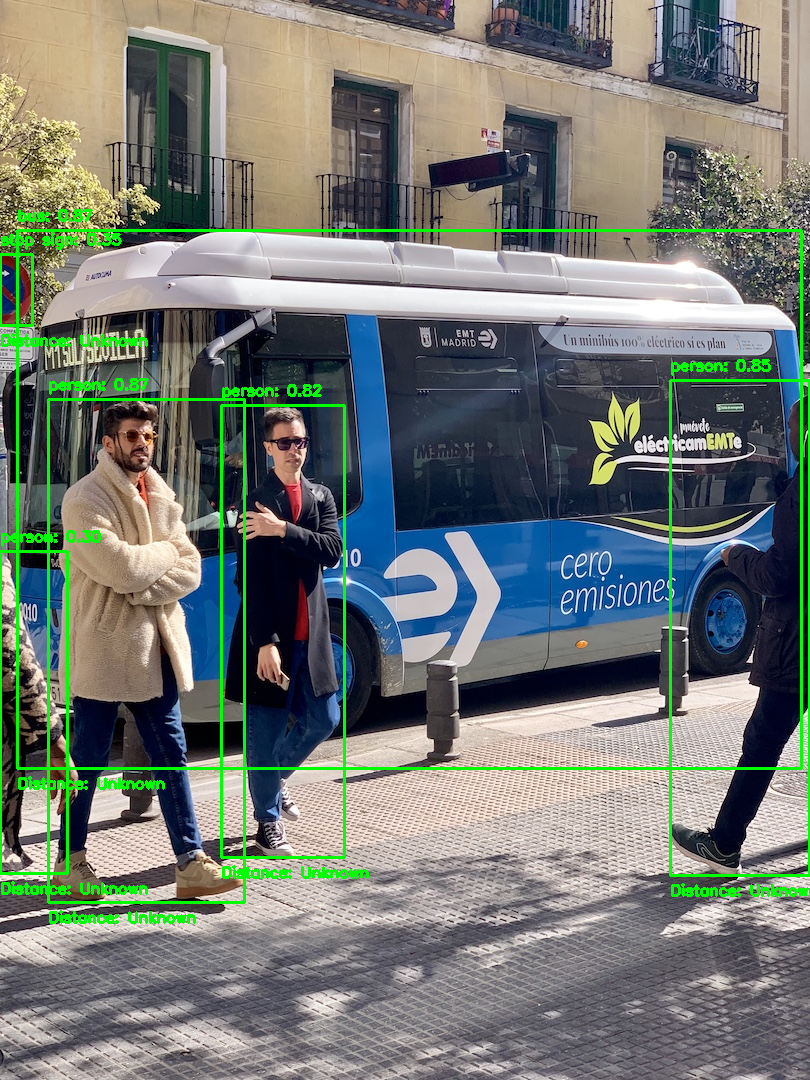

In [2]:
# Import necessary modules
import cv2
import argparse
from run_files.functions.distance_functions import DistanceEstimator
from run_files.functions.hough_functions import LineDetector
from run_files.functions.run_frame import FrameAnalyzer
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

def main(image_path):
    # Build YOLO, detector, and estimator
    yolo_model = YOLO('run_files/models/yolov8n.pt')
    detector = LineDetector()
    estimator = DistanceEstimator()
    fa = FrameAnalyzer(yolo_model, detector, estimator)

    # Load the image
    image = cv2.imread(image_path)

    # Run the frame analyzer on the image
    analyzed_image = fa.run_frame(image, 'run_files/output/csvs/figure2.csv')
    
    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(cv2.cvtColor(analyzed_image, cv2.COLOR_BGR2RGB))

    display(pil_image)

if __name__ == '__main__':
    # Call the main function with the specified image path
    main('run_files/inputs/bus.jpg')